# scikit-learn 中的多项式回归和 Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3., 3., size=100)
X = x.reshape(-1, 1)
y = 0.5 * (x ** 2) + x + 2 + np.random.normal(0., 1., size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
pf.fit(X)
X2 = pf.transform(X)

In [5]:
X[:5]

array([[-0.70023792],
       [ 1.29304211],
       [ 1.67213294],
       [-2.68339725],
       [-1.03993874]])

In [6]:
X2[:5]

array([[ 1.        , -0.70023792,  0.49033315],
       [ 1.        ,  1.29304211,  1.67195789],
       [ 1.        ,  1.67213294,  2.79602857],
       [ 1.        , -2.68339725,  7.20062081],
       [ 1.        , -1.03993874,  1.08147259]])

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_predict = lin_reg.predict(X2)

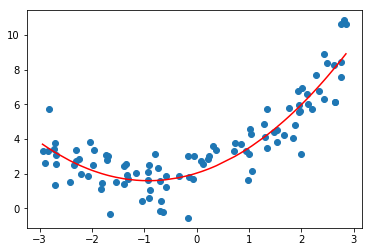

In [8]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

In [9]:
lin_reg.coef_

array([0.        , 0.94780262, 0.5150614 ])

In [10]:
lin_reg.intercept_

2.0247587000001297

## 关于 PolynomialFeatures

In [11]:
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [12]:
pf = PolynomialFeatures(degree=2)
pf.fit(X)
X2 = pf.transform(X)

In [13]:
X2 # 1, x1^1, x2^1, x1^2, x1*x2, x2^2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [14]:
X2.shape

(5, 6)

## Pipeline

In [15]:
x = np.random.uniform(-3., 3., size=100)
X = x.reshape(-1, 1)
y = 0.5 * (x ** 2) + x + 2 + np.random.normal(0., 1., size=100)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('pf', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [17]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

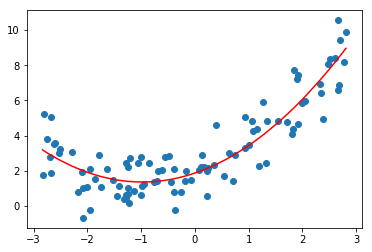

In [18]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')